# Task: Exploratory Data Analysis on the Forbes Richest Athletes Data Set¶

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Introduction to the data set

In [4]:
# Load the data set and inspect the first 20 rows
df = pd.read_csv('Forbes Richest Atheletes (Forbes Richest Athletes 1990-2020).csv')
df.head(20)

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0
5,6,Jack Nicklaus,USA,6,NaN,golf,1990,8.6
6,7,Greg Norman,Australia,7,NaN,golf,1990,8.5
7,8,Michael Jordan,USA,8,NaN,basketball,1990,8.1
8,9,Arnold Palmer,USA,8,NaN,golf,1990,8.1
9,10,Evander Holyfield,USA,8,NaN,boxing,1990,8.1


In [5]:
# Print the info on the columns to check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   S.NO                  301 non-null    int64  
 1   Name                  301 non-null    object 
 2   Nationality           301 non-null    object 
 3   Current Rank          301 non-null    int64  
 4   Previous Year Rank    277 non-null    object 
 5   Sport                 301 non-null    object 
 6   Year                  301 non-null    int64  
 7   earnings ($ million)  301 non-null    float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.9+ KB
None


In [7]:
# Inspect unique values in the categorical variables
for column in df.iloc[:,1:6]:
    print(column, df[column].unique())

Name ['Mike Tyson' 'Buster Douglas' 'Sugar Ray Leonard' 'Ayrton Senna'
 'Alain Prost' 'Jack Nicklaus' 'Greg Norman' 'Michael Jordan'
 'Arnold Palmer' 'Evander Holyfield' 'George Foreman'
 'Donovan "Razor" Ruddock' 'Nigel Mansell' 'Andre Agassi' 'Joe Montana'
 'Jim Courier' 'Monica Seles' 'Riddick Bowe' "Shaquille O'Neal"
 'Lennox Lewis' 'Cecil Fielder' "Shaq O'Neal" 'Gerhard Berger'
 'Wayne Gretzky' 'Michael Moorer' 'Deion Sanders' 'Michael Schumacher'
 'Emmit Smith' 'Dennis Rodman' 'Patrick Ewing' 'Oscar De La Hoya'
 'Tiger Woods' 'Dale Earnhardt' 'Joe Sakic' 'Grant Hill' 'Sergei Federov'
 'Gary Sheffield' 'Kevin Garnett' 'Kobe Bryant' 'Jacques Villeneuve'
 'Jeff Gordon' 'Alex Rodriguez' 'Peyton Manning' 'David Beckham'
 'Michael Vick' 'Lance Armstrong' 'Valentino Rossi' 'Muhammad Ali'
 'Phil Mickelson' 'Tom Brady' 'Kimi Raikkonen' 'Ronaldinho' 'LeBron James'
 'Roger Federer' 'Manny Pacquiao' 'Dale Earnhardt Jr.' 'Floyd Mayweather'
 'Eli Manning' 'Terrell Suggs' 'Cristiano Ronaldo' 'L

## Data Summary:

In this data set, we can see top 10 highest earning athetes each year for the years of 1990-2020. Each row is unique to an athelete and a given year. The information about the atheletes include their name, nationality, sport, earning, their ranking in a given year (1-10) and how they were ranked in the previous year.
There are 301 entries in the data. The only null values are present in the previous year rank column. 
By exploring the categorical unique values, I can see there are also some missing values in the previos year rank column that have been marked as '?', '??', 'none' or 'not ranked'. Some of the values in nationality and sport are repeated. 
Data types include integers, objects and floats. 

# Missing Values

In [68]:
# Check the rows containing missing values to understand potential reason for missing
df[df['Previous Year Rank'].isin(['??', '?', 'none', 'not ranked'])]

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,Mike Tyson,USA,1,not ranked,boxing,1990,28.6
1,Buster Douglas,USA,2,not ranked,boxing,1990,26.0
2,Sugar Ray Leonard,USA,3,not ranked,boxing,1990,13.0
3,Ayrton Senna,Brazil,4,not ranked,auto racing,1990,10.0
4,Alain Prost,France,5,not ranked,auto racing,1990,9.0
5,Jack Nicklaus,USA,6,not ranked,golf,1990,8.6
6,Greg Norman,Australia,7,not ranked,golf,1990,8.5
7,Michael Jordan,USA,8,not ranked,basketball,1990,8.1
8,Arnold Palmer,USA,8,not ranked,golf,1990,8.1
9,Evander Holyfield,USA,8,not ranked,boxing,1990,8.1


In [8]:
# Fill null values in the previous year rank column with a 'not ranked' value
df = df.fillna('not ranked')

# Replace other missing values with 'not ranked' value
df = df.replace(['??', '?', 'none'], 'not ranked')

## Missing data summary:

Valeus are most likely missing from the previous year ranking when the athelete was not ranked in the previous year. For example, they might have taken a break from sport. Null values are also found in the first rows as the table starts at 1990. Null and any other missing values have been replaced with 'not ranked' in the previous year ranking column.

# Data Cleaning 

In [64]:
# Drop any potential duplicates
df = df.drop_duplicates()

In [9]:
# Drop the S.NO column
df = df.drop(['S.NO'],axis=1)

In [13]:
# Replace all above 10 ranking for >10
df = df.replace(['>14', '>20', '>30', '>40', '>100'], '>10')

# Replace 'Filipino' value to remove duplicate nationality
df = df.replace('Filipino', 'Philippines')

# Capitalise first letter of each word in the sport column to remove duplicates (e.g. soccer and Soccer)
df['Sport'] = df['Sport'].str.title()

# Group Baseball and Football together to remove duplicates
df = df.replace(['Baseball', 'American Football'], 'American Football / Baseball')

## Data cleaning summary:

Any potential duplicate rows have been dropped. S.NO column has been removed. Previous year ranking, nationality and sport columns have been formatted to remove duplicate values.

# Data Stories and Visualisations

### First rank earning over time

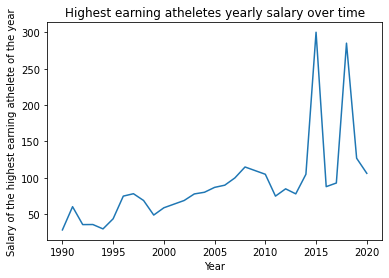

In [15]:
# Create a dataframe only containing 1st ranked Athletes
df_1st_rank = df[df['Current Rank']==1]

# Plot the earnings of 1st ranked athelets over time
plt.plot(df_1st_rank['Year'], df_1st_rank['earnings ($ million)'])
plt.title('Highest earning atheletes yearly salary over time')
plt.xlabel('Year')
plt.ylabel('Salary of the highest earning athelete of the year')
plt.show()

#### There was an upward trend in highest earnings over the years. There were also significant peaks in highest earnings in years 2015 and 2018 reaching up to 300mil per year.

### First rank placements by categorical viariables

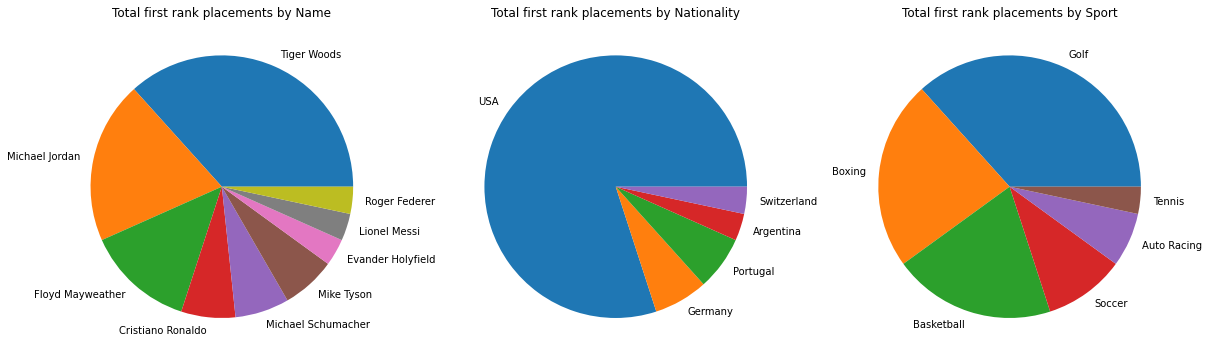

In [88]:
# Get a list of categories to split 1st ranking by
categories = ['Name','Nationality','Sport']

# Create a figure
plt.figure(figsize=[20,10])

# Plot a pie chart of 1st rank counts for all categories
for i, cat in enumerate(categories):
    total_firsts = df_1st_rank.groupby(cat).count().sort_values(by='Current Rank', ascending = False).reset_index().iloc[:,0:2]
    plt.subplot(1, 3, i+1)
    plt.pie(total_firsts[total_firsts.columns[1]], labels = total_firsts[total_firsts.columns[0]])
    plt.title(f'Total first rank placements by {cat}')
plt.show()


#### Tiger Woods was placed at the 1st rank the most, followed by Micheal Jordan and Floyd Mayweather. USA nationality atheletes were placed 1st significantly more often than any other nationality. Golf was the sport that most frequently appeared in the 1st rank, followed by Boxing and Basketball. 

### Explore highest earning atheltes

In [45]:
# Inspect top 10 highest earning atheltes of the year
df.sort_values(by='earnings ($ million)', ascending = False).head(10)

,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
241,Floyd Mayweather,USA,1,1,Boxing,2015,300.0
271,Floyd Mayweather,USA,1,>10,Boxing,2018,285.0
242,Manny Pacquiao,Philippines,2,11,Boxing,2015,160.0
281,Lionel Messi,Argentina,1,2,Soccer,2019,127.0
171,Tiger Woods,USA,1,1,Golf,2008,115.0
272,Lionel Messi,Argentina,2,3,Soccer,2018,111.0
181,Tiger Woods,USA,1,1,Golf,2009,110.0
282,Cristiano Ronaldo,Portugal,2,3,Soccer,2019,109.0
273,Cristiano Ronaldo,Portugal,3,1,Soccer,2018,108.0
291,Roger Federer,Switzerland,1,5,Tennis,2020,106.3


#### Floyd Mayweather's earnings majorly excedes any other top athletes earnings and contributed by significant peak of 1st rank earnings in years 2015 and 2018

In [52]:
# Get the top 20 highest earing atheletes
highest_earners = df.groupby(['Name', 'Nationality', 'Sport']).mean()['earnings ($ million)'].sort_values(ascending = False).reset_index()
highest_earners = highest_earners.head(10)

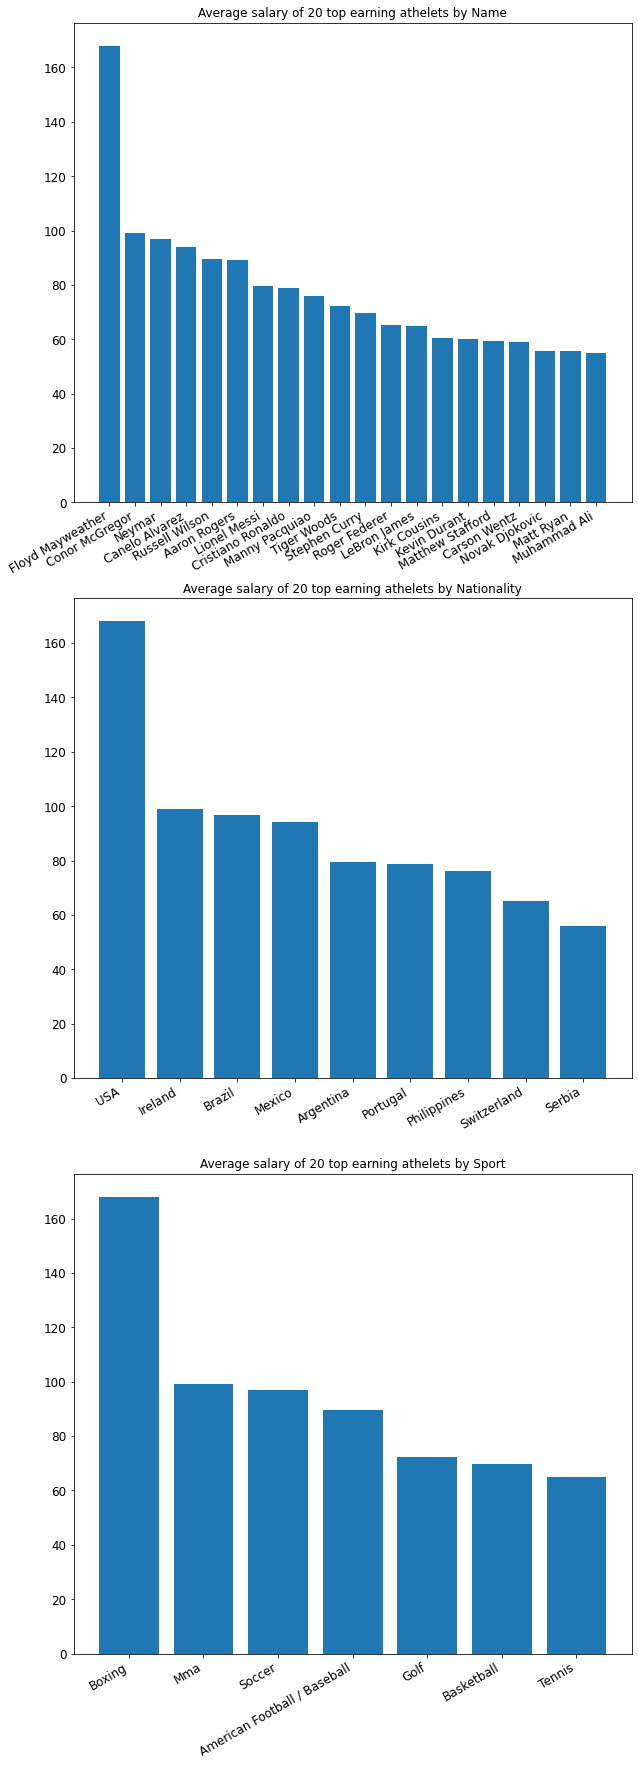

In [63]:
# Create a figure
plt.figure(figsize=[10,30])

# Plot a bar chart of mean earnings of top 20 highest earners for each category
for i, cat in enumerate(categories):
    plt.subplot(3, 1, i+1)
    plt.bar(highest_earners[cat], highest_earners['earnings ($ million)'])
    plt.xticks(rotation=30, ha='right')
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.title(f'Average salary of 20 top earning athelets by {cat}')
plt.show()

#### On average, Floyd Mayweather was the highest earning athlete, USA was the highest earning antionatily and Boxing was the highest earning sport. Top results for athete and sport are different here than when counting 1st rank placements. This shows earning differs by year and being placed higher does not necessarily mean having higher earnings than a lower ranked athelete in a different year. 

### Pattern or ranking placement for top atheletes over time

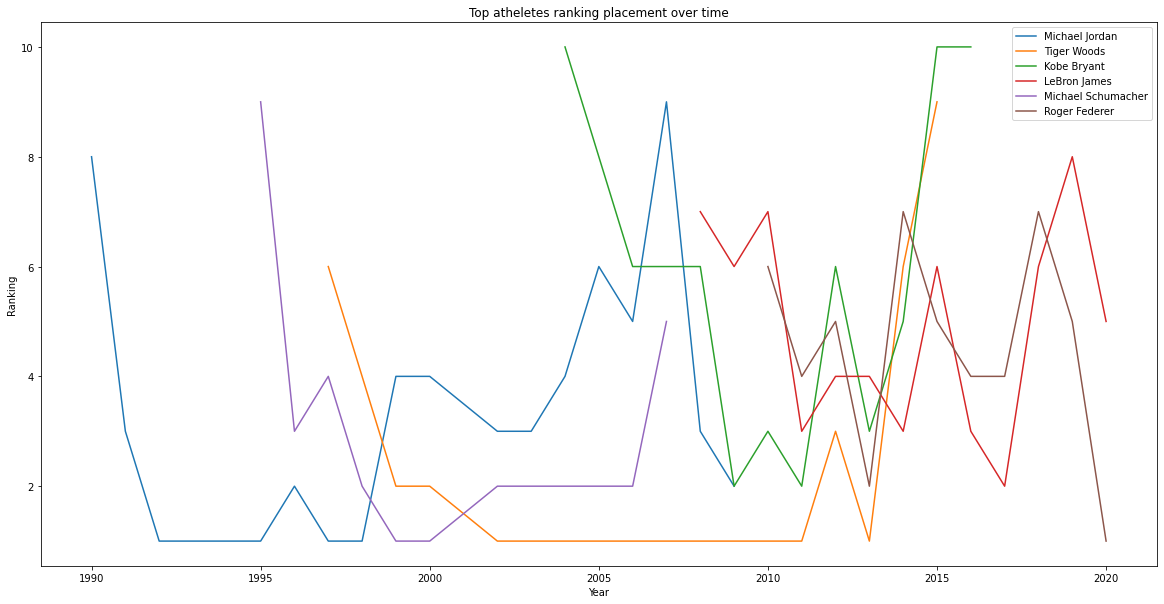

In [87]:
# Get a count of how many times atheletes were included in the top 10
top_times_on_list = df.groupby('Name').count().sort_values(by='Nationality', ascending = False).reset_index().iloc[:,0:2]

# Select atheletes that were on the list at least 12 times
top_times_on_list = top_times_on_list[top_times_on_list['Nationality']>=12]

# Get a list of names
top_atheletes = top_times_on_list['Name'].tolist()
top_atheletes

# Create a figure
plt.figure(figsize=[20,10])

# Plot each top athelete ranking placement over time
for athelete in top_atheletes:
    athelete_years = df[df['Name']==athelete]
    years = df['Year'].unique()
    years = pd.DataFrame(years, columns = ['Year'])
    athelete_years = years.merge(athelete_years, on='Year', how='left')
    plt.plot(athelete_years['Year'], athelete_years['Current Rank'], label = athelete)
    plt.legend()
plt.title('Top atheletes ranking placement over time')
plt.ylabel('Ranking')
plt.xlabel('Year')
plt.show()




#### This graph shows six atheletes that were placed at top 10 ranking the most and how their ranking has been changing over time. There seems to be a pattern for most atheletes to start at a lower ranking, move to higher spots and then subsequently fall in ranking and disappear from the top. All of the atheletes stayed in the top 10 without a break until they have fallen out of the top 10 for good. It is visible that there were a few long term stars between 1990 early 2000s (Jordan, Schumacher and Woods) that took a spotlight one after the other. After 2005, there were a few long term top atheletes that stayed pretty close to each other and mostly occupied mid ranks throughout. 

# This Report Was Written by: Joanna Scharoch